In [2]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [33]:
def init_daily_reports(path):
  df_master = pd.DataFrame()
  flag = False
  files_in_folder = glob.glob(path)
  for filename in files_in_folder:    
    zip_file = ZipFile(filename)
    for text_file in zip_file.infolist():
      # if not text_file.filename.startswith('__MACOSX/'):
      if text_file.filename.endswith('.csv'):
        date = re.search('\d*-\d*-\d*', text_file.filename)[0]
        date_time_value = pd.to_datetime(date)
        df = pd.read_csv(zip_file.open(text_file.filename), sep=",", header=0)
        df["Date"] = date_time_value
        df.rename(columns = {'Province_State':'State'}, inplace = True)
        df.drop((df[df.State.isin(["United States"])].index) | (df[df.State.isnull()].index), inplace=True)
      if not flag:
        df_master = df
        flag = True
      else:
        df_master = pd.concat([df_master, df])
  df_master.set_index(["Date", "State"], inplace=True)
  df_master.sort_index(inplace=True)
  return df_master

covid_daily_reports = init_daily_reports(r'**csv_files/csse_covid_19_daily_reports_us.zip')

covid_daily_reports = covid_daily_reports.reset_index()

states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']
covid_daily_reports = covid_daily_reports[covid_daily_reports["State"].isin(states) == True]
covid_daily_reports.set_index(["Date", "State"], inplace=True)
covid_daily_reports.head()



Country_Region          Last_Update      Lat     Long_  \
Date       State                                                               
2021-01-01 Alabama                US  2021-01-02 05:30:44  32.3182  -86.9023   
           Alaska                 US  2021-01-02 05:30:44  61.3707 -152.4044   
           Arizona                US  2021-01-02 05:30:44  33.7298 -111.4312   
           Arkansas               US  2021-01-02 05:30:44  34.9697  -92.3731   
           California             US  2021-01-02 05:30:44  36.1162 -119.6816   

                       Confirmed  Deaths  Recovered    Active  FIPS  \
Date       State                                                      
2021-01-01 Alabama        365747    4872   202137.0  158738.0   1.0   
           Alaska          47019     206     7165.0   39648.0   2.0   
           Arizona        530267    9015    76934.0  444318.0   4.0   
           Arkansas       229442    3711   199247.0   26484.0   5.0   
           California    2435650   26169        NaN       NaN   6.0   

                       Incident_Rate  Total_Test_Results  People_Hospitalized  \
Date       State                                                                
2021-01-01 Alabama       7459.375895           3275341.0                  NaN   
           Alaska        6427.355802           1275750.0                  NaN   
           Arizona       7285.171274           5155330.0                  NaN   
           Arkansas      7602.945718           2051488.0                  NaN   
           California    6164.469663          33058311.0                  NaN   

                       Case_Fatality_Ratio         UID ISO3   Testing_Rate  \
Date       State                                                             
2021-01-01 Alabama                1.332068  84000001.0  USA   66800.273700   
           Alaska                 0.438121  84000002.0  USA  174391.185778   
           Arizona                1.700087  84000004.0  USA   39551.860582   
           Arkansas               1.617402  84000005.0  USA   67979.497674   
           California             1.074344  84000006.0  USA   83666.036710   

                       Hospitalization_Rate  
Date       State                             
2021-01-01 Alabama                      NaN  
           Alaska                       NaN  
           Arizona                      NaN  
           Arkansas                     NaN  
           California                   NaN

### Data Cleaning

<AxesSubplot:ylabel='Date-State'>

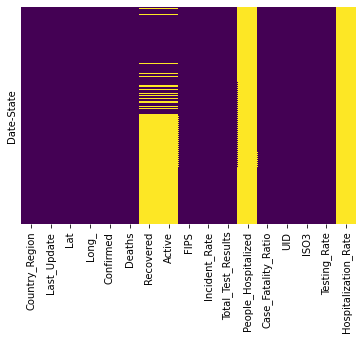

In [34]:
sns.heatmap(covid_daily_reports.isnull(),yticklabels = False, cbar = False, cmap='viridis')